# NBA Draft Analysis

In [1]:
import os
import sqlite3
import csv

import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
conn = sqlite3.connect('nba_data.db')

nba_data = pd.read_csv('draft78.csv')

nba_data.to_sql('nba_data', conn, if_exists ='replace')

In [3]:
nba = pd.read_sql_query("""SELECT * FROM nba_data""", conn)

In [4]:
nba

,index,Pick,Player,Yrs,Draft
0,0,1,Mychal Thompson,12.0,1978
1,1,2,Phil Ford,7.0,1978
2,2,3,Rick Robey,8.0,1978
3,3,4,Micheal Ray Richardson,8.0,1978
4,4,5,Purvis Short,12.0,1978
5,5,6,Larry Bird,13.0,1978
6,6,7,Ron Brewer,8.0,1978
7,7,8,Freeman Williams,6.0,1978
8,8,9,Reggie Theus,13.0,1978
9,9,10,Butch Lee,2.0,1978


In [5]:
nba.rename(
    columns={
        'Pick':'Pick',
        'Player': 'Player Name',
        'Yrs': 'Years',
        'Draft': 'Year Drafted'
        
        
    }, 
    inplace=True)

In [42]:
nba = pd.read_sql_query("""
    SELECT 
        Player,
        Pick,
        Yrs
        FROM nba_data
        ORDER BY Yrs desc
        LIMIT 49;
""", conn)

In [43]:
nba.sort_values(by="Yrs", ascending=False)

,Player,Pick,Yrs
0,Kevin Willis,11,21.0
1,Kevin Garnett,5,21.0
2,Kobe Bryant,13,20.0
6,Shaquille O'Neal,1,19.0
8,Juwan Howard,5,19.0
7,Jason Kidd,2,19.0
9,Tim Duncan,1,19.0
5,Karl Malone,13,19.0
4,Charles Oakley,9,19.0
3,John Stockton,16,19.0


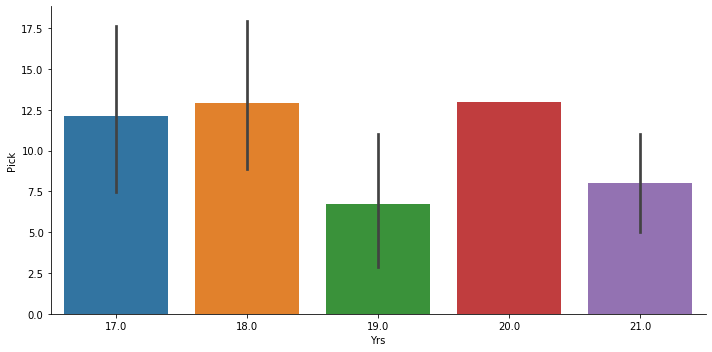

In [47]:
sns.catplot(
    x="Yrs",
    y="Pick",
    data=nba,
    kind="bar",
    height=5,
    aspect=2,
)